<a href="https://colab.research.google.com/github/rachmadyogoo/pengolahancitra_2025/blob/main/Praktikum4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Praktikum 1. Segmentasi Menggunakan Thresholding Global dan Otsu


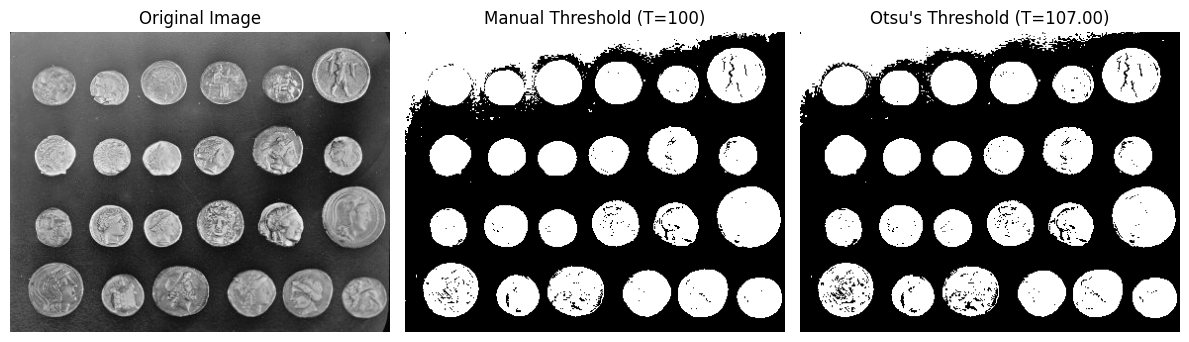

Nilai threshold Otsu yang ditemukan: 107


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, filters, img_as_ubyte
from skimage.color import rgb2gray

image_coins = data.coins()

thresh_manual = 100
binary_manual = image_coins > thresh_manual

thresh_otsu = filters.threshold_otsu(image_coins)
binary_otsu = image_coins > thresh_otsu

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image_coins, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_manual, cmap=plt.cm.gray)
ax[1].set_title(f'Manual Threshold (T={thresh_manual})')
ax[1].axis('off')

ax[2].imshow(binary_otsu, cmap=plt.cm.gray)
ax[2].set_title(f'Otsu\'s Threshold (T={thresh_otsu:.2f})')
ax[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Nilai threshold Otsu yang ditemukan: {thresh_otsu}")


#Praktikum 2. Segmentasi Menggunakan Region Growing (Contoh Sederhana)

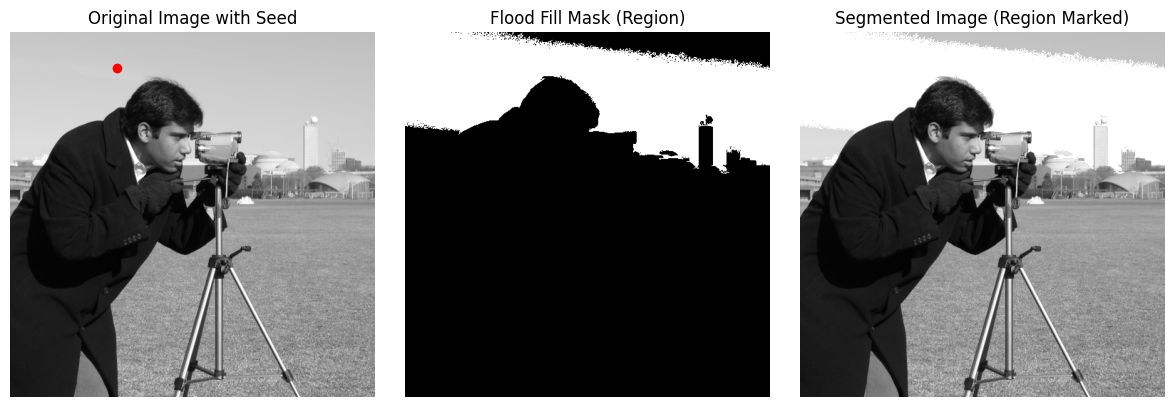

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, color

image_camera = data.camera()

seed_point = (50, 150)

flood_mask = segmentation.flood(image_camera, seed_point, tolerance=10)

segmented_image = np.copy(image_camera)
segmented_image[flood_mask] = 255

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image_camera, cmap=plt.cm.gray)
ax[0].plot(seed_point[1], seed_point[0], 'ro')
ax[0].set_title('Original Image with Seed')
ax[0].axis('off')

ax[1].imshow(flood_mask, cmap=plt.cm.gray)
ax[1].set_title('Flood Fill Mask (Region)')
ax[1].axis('off')

ax[2].imshow(segmented_image, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image (Region Marked)')
ax[2].axis('off')

plt.tight_layout()
plt.show()


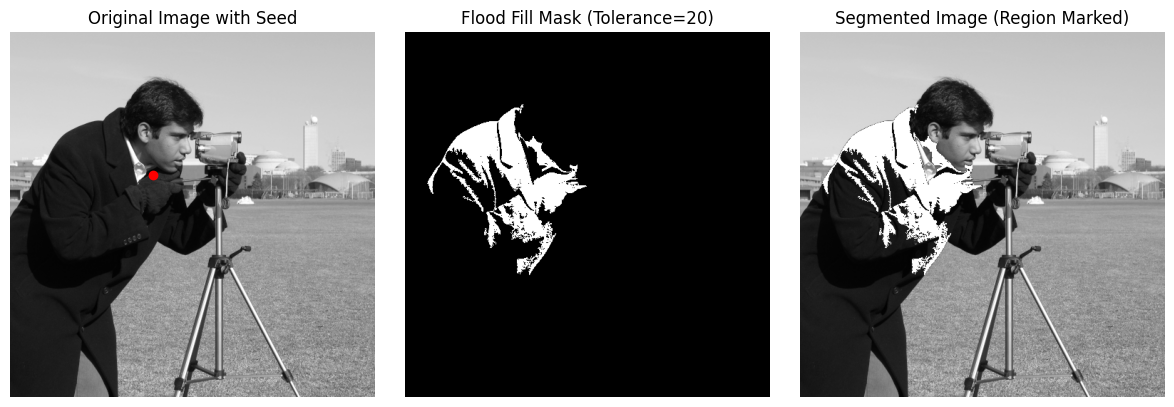

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation

image_camera = data.camera()

seed_point = (200, 200)

tolerance_value = 20
flood_mask = segmentation.flood(image_camera, seed_point, tolerance=tolerance_value)

segmented_image = np.copy(image_camera)
segmented_image[flood_mask] = 255

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image_camera, cmap=plt.cm.gray)
ax[0].plot(seed_point[1], seed_point[0], 'ro')
ax[0].set_title('Original Image with Seed')
ax[0].axis('off')

ax[1].imshow(flood_mask, cmap=plt.cm.gray)
ax[1].set_title(f'Flood Fill Mask (Tolerance={tolerance_value})')
ax[1].axis('off')

ax[2].imshow(segmented_image, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image (Region Marked)')
ax[2].axis('off')

plt.tight_layout()
plt.show()


#Praktikum 3. Segmentasi Citra Berwarna Menggunakan K-Means Clustering

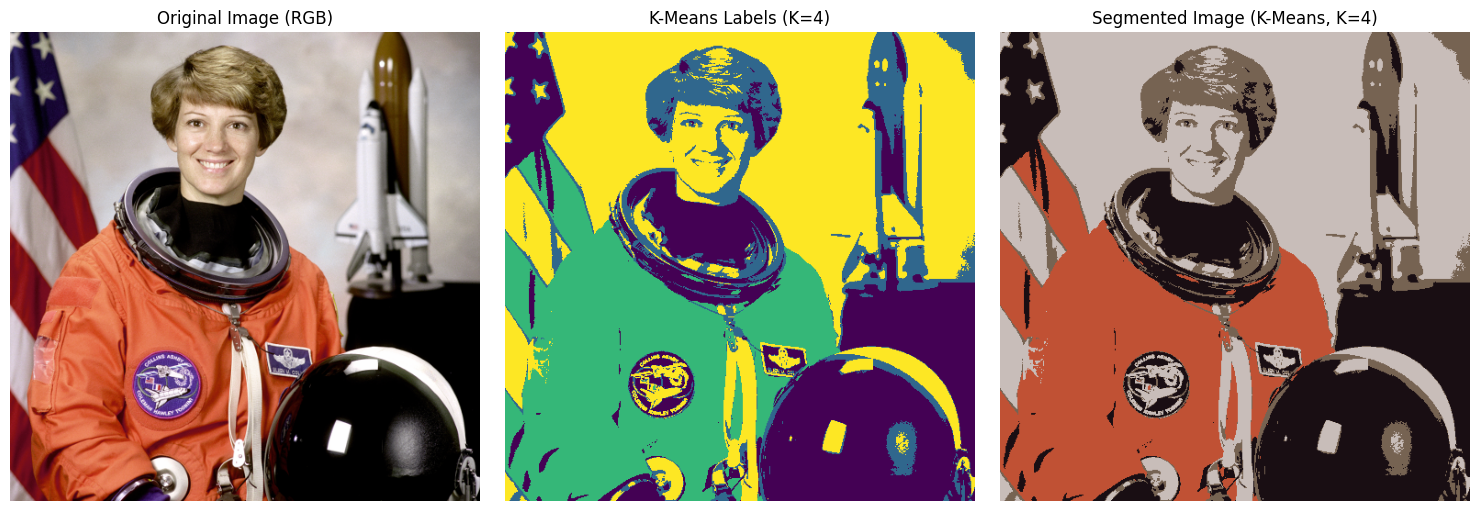

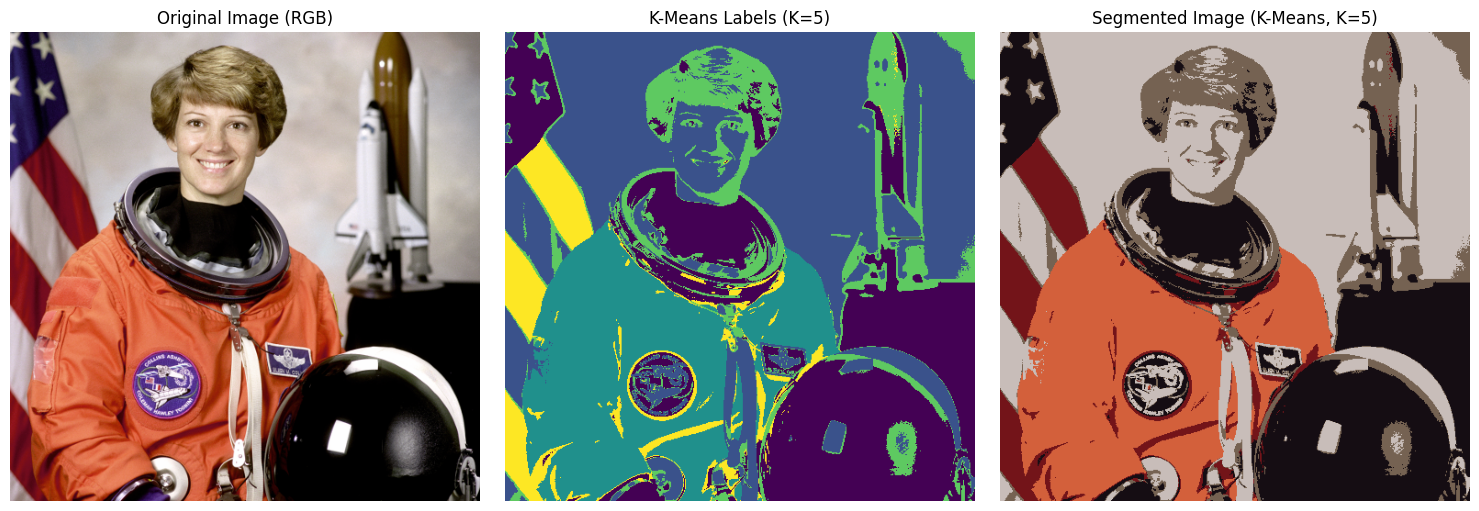

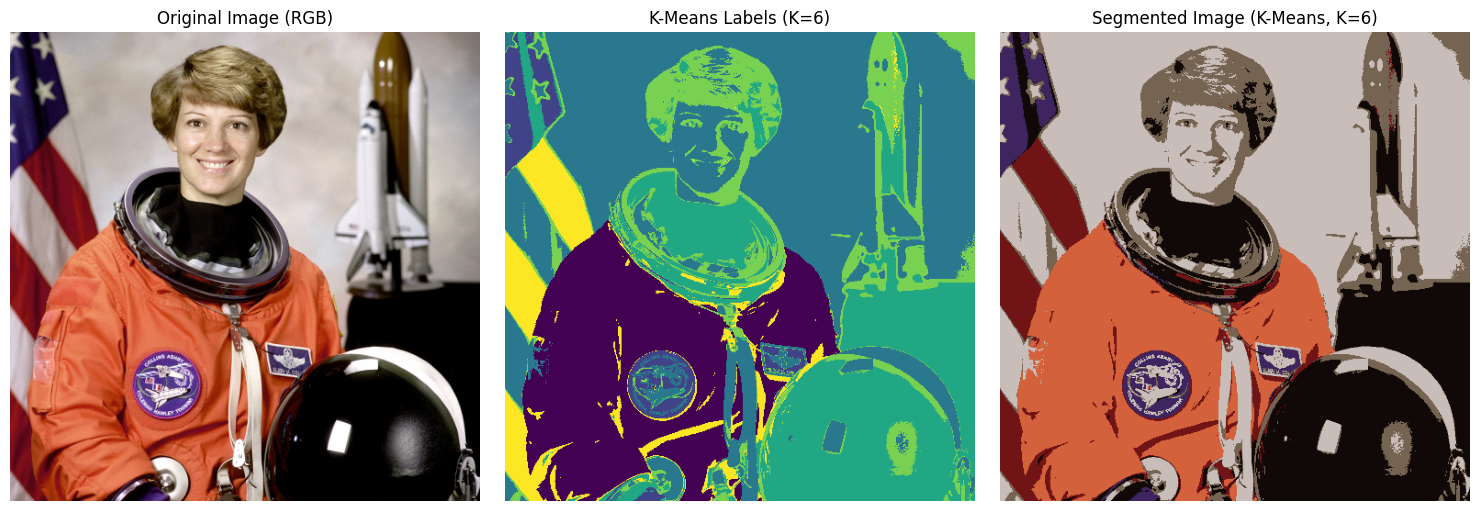

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, lab2rgb
import warnings

image_astro = data.astronaut()
image_astro_float = image_astro.astype(float) / 255.0
image_lab = rgb2lab(image_astro_float)
rows, cols, dims = image_lab.shape
pixel_features = image_lab.reshape(rows * cols, dims)

for n_clusters in [4, 5, 6]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        pixel_labels = kmeans.fit_predict(pixel_features)

    segmented_labels = pixel_labels.reshape(rows, cols)

    segmented_image_kmeans = np.zeros_like(image_lab)
    centers_lab = kmeans.cluster_centers_
    for k in range(n_clusters):
        cluster_pixels = (pixel_labels == k)
        mask_k = cluster_pixels.reshape(rows, cols)
        segmented_image_kmeans[mask_k] = centers_lab[k]

    segmented_image_rgb = lab2rgb(segmented_image_kmeans)

    fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
    ax = axes.ravel()

    ax[0].imshow(image_astro)
    ax[0].set_title('Original Image (RGB)')
    ax[0].axis('off')

    ax[1].imshow(segmented_labels, cmap='viridis')
    ax[1].set_title(f'K-Means Labels (K={n_clusters})')
    ax[1].axis('off')

    ax[2].imshow(segmented_image_rgb)
    ax[2].set_title(f'Segmented Image (K-Means, K={n_clusters})')
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()


#Praktikum 4. Segmentasi Berbasis Tepi Menggunakan Watershed

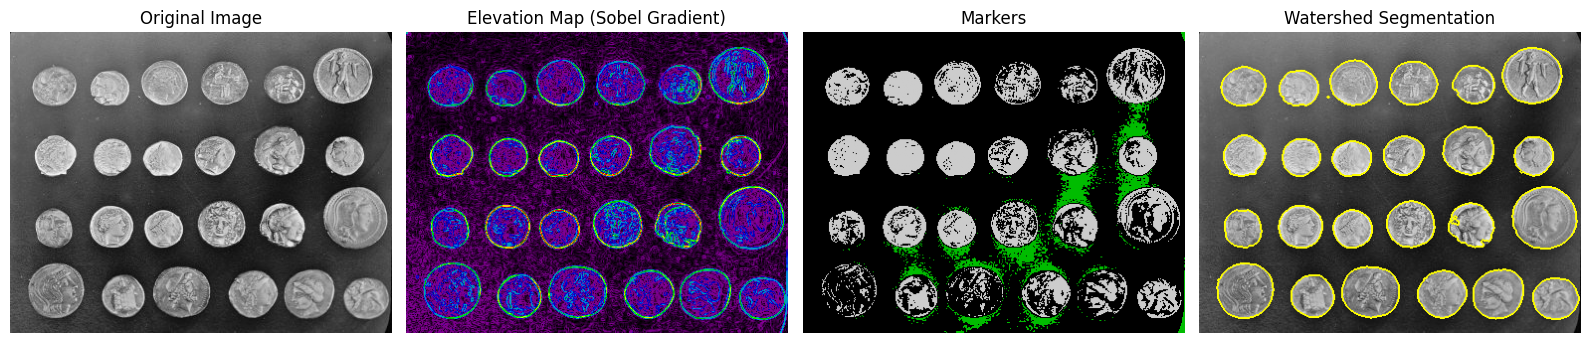

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, segmentation, morphology, measure
from scipy import ndimage as ndi

image_coins = data.coins()

elevation_map = filters.sobel(image_coins)

markers = np.zeros_like(image_coins)
markers[image_coins < 30] = 1
markers[image_coins > 150] = 2

segmentation_watershed = segmentation.watershed(elevation_map, markers)

segmented_colored = segmentation.mark_boundaries(image_coins, segmentation_watershed)

fig, axes = plt.subplots(ncols=4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_coins, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(elevation_map, cmap=plt.cm.nipy_spectral)
ax[1].set_title('Elevation Map (Sobel Gradient)')
ax[1].axis('off')

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Markers')
ax[2].axis('off')

ax[3].imshow(segmented_colored)
ax[3].set_title('Watershed Segmentation')
ax[3].axis('off')

plt.tight_layout()
plt.show()


#Praktikum 5. Perbandingan Visual Hasil Segmentasi

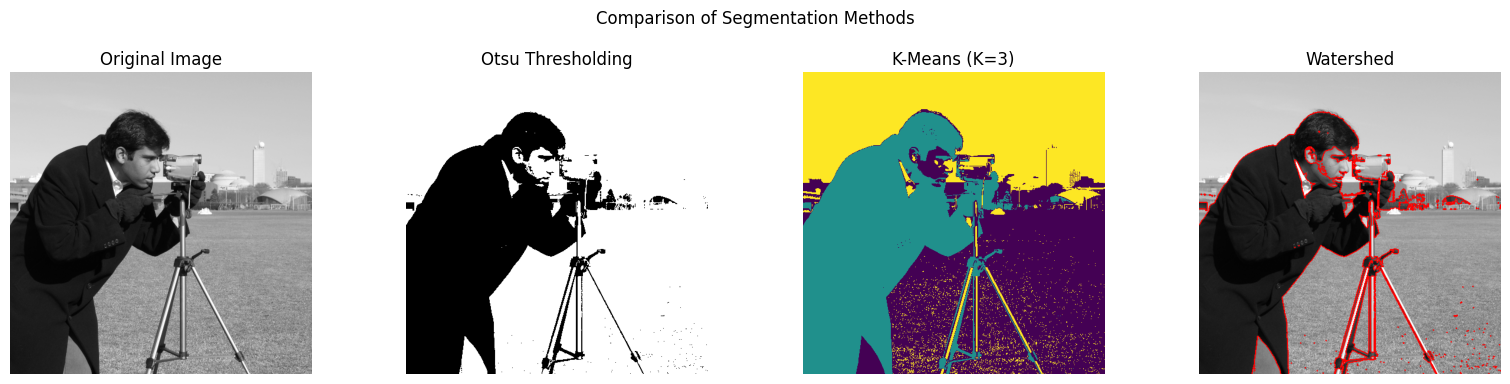

In [4]:
import matplotlib.pyplot as plt
from skimage import data, filters, segmentation, img_as_float, color
from sklearn.cluster import KMeans
import numpy as np
import warnings

image = data.camera()
image_float = img_as_float(image)

thresh_otsu = filters.threshold_otsu(image)
binary_otsu = image > thresh_otsu

rows, cols = image.shape
pixel_features = image_float.reshape(rows * cols, 1)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pixel_labels = kmeans.fit_predict(pixel_features)
segmented_kmeans_labels = pixel_labels.reshape(rows, cols)

elevation_map = filters.sobel(image)
markers = np.zeros_like(image)
markers[image < thresh_otsu] = 1
markers[image > thresh_otsu] = 2
segmentation_watershed = segmentation.watershed(elevation_map, markers)

fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1].set_title('Otsu Thresholding')
ax[1].axis('off')

ax[2].imshow(segmented_kmeans_labels, cmap='viridis')
ax[2].set_title(f'K-Means (K={n_clusters})')
ax[2].axis('off')

segmented_watershed_colored = segmentation.mark_boundaries(image_float, segmentation_watershed, color=(1,0,0))
ax[3].imshow(segmented_watershed_colored)
ax[3].set_title('Watershed')
ax[3].axis('off')

plt.suptitle('Comparison of Segmentation Methods')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#Eksperimen Thresholding

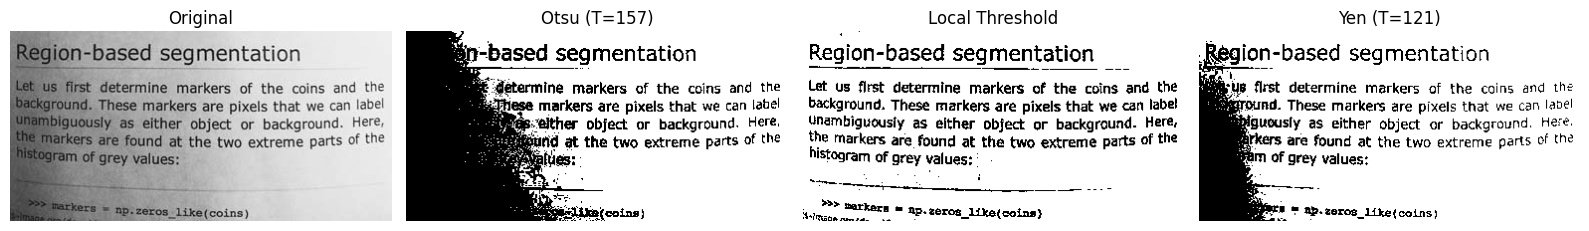

In [5]:
import matplotlib.pyplot as plt
from skimage import data, filters
from skimage.filters import threshold_otsu, threshold_local, threshold_yen
from skimage.color import rgb2gray

# 1. Memuat citra
image_page = data.page()  # Sudah grayscale

# 2. Thresholding Otsu
thresh_otsu = threshold_otsu(image_page)
binary_otsu = image_page > thresh_otsu

# 3. Thresholding Local (block size bisa diubah, misal 35)
block_size = 35
local_thresh = threshold_local(image_page, block_size, offset=10)
binary_local = image_page > local_thresh

# 4. Thresholding Yen
thresh_yen = threshold_yen(image_page)
binary_yen = image_page > thresh_yen

# 5. Visualisasi hasil
fig, axes = plt.subplots(ncols=4, figsize=(16, 4))
ax = axes.ravel()

ax[0].imshow(image_page, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1].set_title(f"Otsu (T={thresh_otsu})")

ax[2].imshow(binary_local, cmap=plt.cm.gray)
ax[2].set_title("Local Threshold")

ax[3].imshow(binary_yen, cmap=plt.cm.gray)
ax[3].set_title(f"Yen (T={thresh_yen})")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()


#Tiga Metode Segmentasi

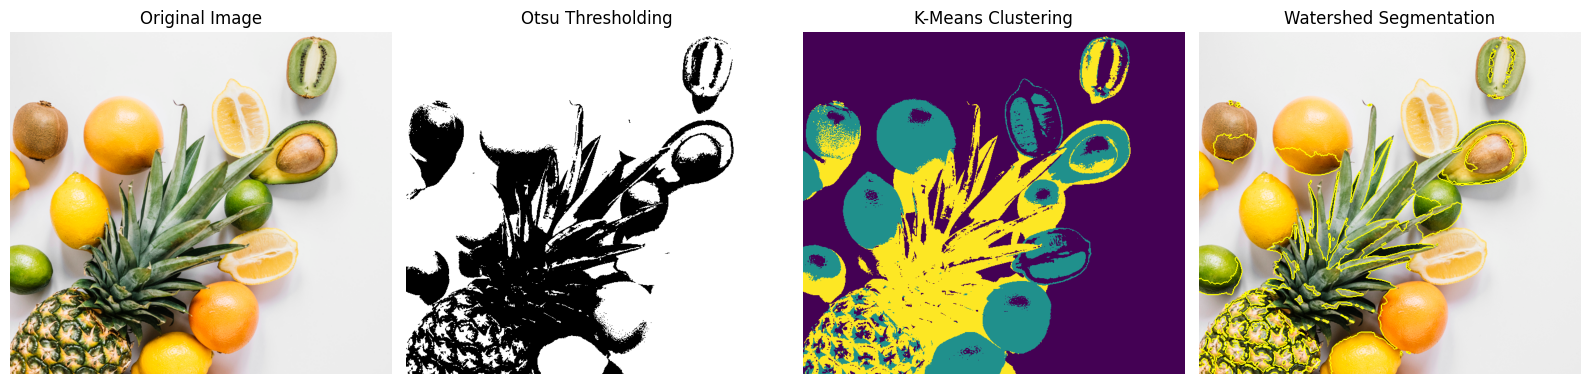

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, segmentation, color, morphology
from skimage.color import rgb2gray, rgb2lab, lab2rgb
from sklearn.cluster import KMeans
from scipy import ndimage as ndi

image = io.imread('buah.png')
if image.shape[2] == 4:
    image = image[:, :, :3]

image_gray = rgb2gray(image)

# ---------- METODE 1: OTSU ----------
thresh_otsu = filters.threshold_otsu(image_gray)
binary_otsu = image_gray > thresh_otsu

# ---------- METODE 2: K-MEANS ----------
image_lab = rgb2lab(image)
rows, cols, dims = image_lab.shape
pixels = image_lab.reshape(rows * cols, dims)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
labels = kmeans.fit_predict(pixels)
seg_kmeans = labels.reshape(rows, cols)

# ---------- METODE 3: WATERSHED ----------
elevation_map = filters.sobel(image_gray)

# Ensure markers is an integer array
markers = np.zeros_like(image_gray, dtype=int)
markers[image_gray < 0.3] = 1
markers[image_gray > 0.7] = 2

# Perform watershed segmentation
seg_watershed = segmentation.watershed(elevation_map, markers)

# Visualize boundaries of watershed segmentation
boundaries = segmentation.mark_boundaries(image, seg_watershed)

# ---------- VISUALISASI ----------
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
ax = axes.ravel()
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(binary_otsu, cmap='gray')
ax[1].set_title("Otsu Thresholding")
ax[1].axis("off")

ax[2].imshow(seg_kmeans, cmap='viridis')
ax[2].set_title("K-Means Clustering")
ax[2].axis("off")

ax[3].imshow(boundaries)
ax[3].set_title("Watershed Segmentation")
ax[3].axis("off")

plt.tight_layout()
plt.show()
